<a href="https://colab.research.google.com/github/Taiba-Naz/CNN_Classifier/blob/main/Final_BMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MobileNet With Keras

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#print("Num GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [10]:
#download a MobileNet model and save it in a varable name mobile
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [11]:
#Prepare the images to get it in a format that the model expects
def prepare_image(file):
    img_path = '/content/drive/MyDrive/training_bms/baby_sleeping'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)


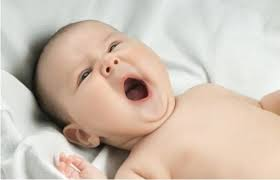

In [12]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/training_bms/baby_not_sleeping/20.jpg', width=300,height=200)

In [13]:
#Reproducible Results With Keras
import random as rn
import os
os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = ''
np.random.seed(37)
rn.seed(1254)
tf.random.set_seed(89)

In [14]:
train_path = '/content/drive/MyDrive/training_bms'
valid_path = '/content/drive/MyDrive/validation_bms'
test_path='/content/drive/MyDrive/test_bms'

In [15]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10)

Found 175 images belonging to 2 classes.
Found 77 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


# Build The Fine-Tuned Model

In [16]:
#download the MobileNet model, and print a summary of it
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [17]:
#output from the sixth to last layer of the model and store it in this variable x
#Note that We're not including the last five layers of the original MobileNet here
x = mobile.layers[-6].output
x

<KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'global_average_pooling2d_1')>

In [18]:
output = Dense(units=2, activation='sigmoid')(x)

In [19]:
#New fine tuned model
model = Model(inputs=mobile.input, outputs=output)

In [20]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

# Train The Model

In [22]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
history=model.fit(x=train_batches,steps_per_epoch=len(train_batches),validation_data=valid_batches,validation_steps=len(valid_batches),epochs=30,verbose=2)

Epoch 1/30
18/18 - 100s - loss: 0.5861 - accuracy: 0.6629 - val_loss: 1.0654 - val_accuracy: 0.5714
Epoch 2/30
18/18 - 1s - loss: 0.2444 - accuracy: 0.9200 - val_loss: 1.2108 - val_accuracy: 0.5714
Epoch 3/30
18/18 - 1s - loss: 0.1296 - accuracy: 0.9657 - val_loss: 0.8720 - val_accuracy: 0.5974
Epoch 4/30
18/18 - 1s - loss: 0.0930 - accuracy: 0.9714 - val_loss: 0.6220 - val_accuracy: 0.6494
Epoch 5/30
18/18 - 1s - loss: 0.0827 - accuracy: 0.9943 - val_loss: 0.4387 - val_accuracy: 0.7662
Epoch 6/30
18/18 - 1s - loss: 0.0781 - accuracy: 0.9829 - val_loss: 0.2821 - val_accuracy: 0.9091
Epoch 7/30
18/18 - 1s - loss: 0.0426 - accuracy: 1.0000 - val_loss: 0.2422 - val_accuracy: 0.9610
Epoch 8/30
18/18 - 1s - loss: 0.0447 - accuracy: 0.9943 - val_loss: 0.2262 - val_accuracy: 0.9740
Epoch 9/30
18/18 - 1s - loss: 0.0272 - accuracy: 1.0000 - val_loss: 0.2174 - val_accuracy: 0.9610
Epoch 10/30
18/18 - 1s - loss: 0.0588 - accuracy: 1.0000 - val_loss: 0.2199 - val_accuracy: 0.9481
Epoch 11/30
18/18

# Fit the model

In [24]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=10,verbose=2)

Epoch 1/10
18/18 - 1s - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.2339 - val_accuracy: 0.5974
Epoch 2/10
18/18 - 1s - loss: 0.0333 - accuracy: 0.9943 - val_loss: 0.8958 - val_accuracy: 0.6494
Epoch 3/10
18/18 - 1s - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.5212 - val_accuracy: 0.7403
Epoch 4/10
18/18 - 1s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4546 - val_accuracy: 0.7532
Epoch 5/10
18/18 - 1s - loss: 0.0289 - accuracy: 1.0000 - val_loss: 0.5122 - val_accuracy: 0.7532
Epoch 6/10
18/18 - 1s - loss: 0.0258 - accuracy: 0.9886 - val_loss: 0.2105 - val_accuracy: 0.9351
Epoch 7/10
18/18 - 1s - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.1914 - val_accuracy: 0.9351
Epoch 8/10
18/18 - 1s - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.1807 - val_accuracy: 0.9351
Epoch 9/10
18/18 - 1s - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.5826 - val_accuracy: 0.7013
Epoch 10/10
18/18 - 1s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.6208 - val_accuracy: 0.7013


In [25]:
model.save('BMS_classification.h5')

# Data Augmentation

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [27]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [28]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

In [29]:
chosen_image = random.choice(os.listdir('/content/drive/MyDrive/training_bms/baby_sleeping '))

In [30]:

image_path = '/content/drive/MyDrive/training_bms/baby_sleeping /' + chosen_image

In [31]:
image = np.expand_dims(plt.imread(image_path),0)

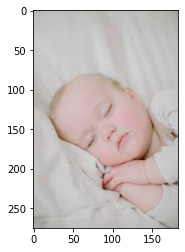

In [32]:
plt.imshow(image[0])

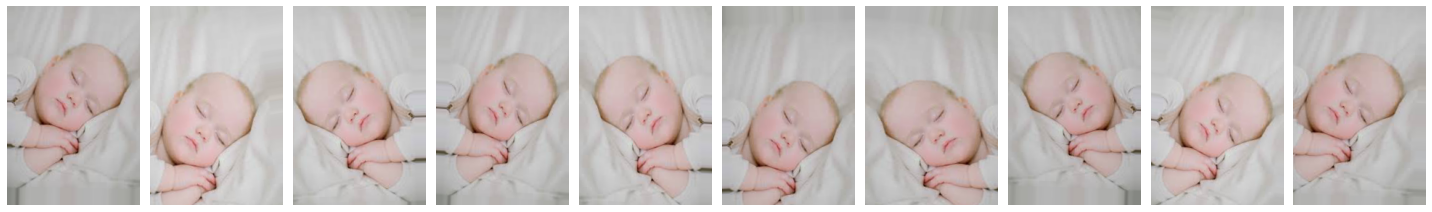

In [33]:
# we'll generate batches of augmented images from the original image.
aug_iter = gen.flow(image)
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]
plotImages(aug_images)


# Create batches of augmented images for all images in training directory 

In [34]:
'''
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
for i in (os.listdir('/content/drive/MyDrive/training_bms/baby_sleeping ')):
  img = load_img('/content/drive/MyDrive/training_bms/baby_sleeping /'+str(i))  # this is a PIL image
  x = img_to_array(img)  # this is a Numpy array with shape (3, 224, 224)
  x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 224, 224)

  # the .flow() command below generates batches of randomly transformed images
  # and saves the results to the `preview/` directory
  i = 0
  for batch in datagen.flow(x, batch_size=1,
                            save_to_dir='/content/drive/MyDrive/training_bms_augm/baby_sleeping_augm', save_prefix='augm', save_format='jpg'):
      i += 1
      if i > 20:
          break  # otherwise the generator would loop indefinitely
'''        
          

"\nfrom keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img\n\ndatagen = ImageDataGenerator(\n        rotation_range=40,\n        width_shift_range=0.2,\n        height_shift_range=0.2,\n        shear_range=0.2,\n        zoom_range=0.2,\n        horizontal_flip=True,\n        fill_mode='nearest')\nfor i in (os.listdir('/content/drive/MyDrive/training_bms/baby_sleeping ')):\n  img = load_img('/content/drive/MyDrive/training_bms/baby_sleeping /'+str(i))  # this is a PIL image\n  x = img_to_array(img)  # this is a Numpy array with shape (3, 224, 224)\n  x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 224, 224)\n\n  # the .flow() command below generates batches of randomly transformed images\n  # and saves the results to the `preview/` directory\n  i = 0\n  for batch in datagen.flow(x, batch_size=1,\n                            save_to_dir='/content/drive/MyDrive/training_bms_augm/baby_sleeping_augm', save_prefix='augm', save_f

In [35]:
'''
for i in (os.listdir('/content/drive/MyDrive/training_bms/baby_not_sleeping')):
  img = load_img('/content/drive/MyDrive/training_bms/baby_not_sleeping/'+str(i))  # this is a PIL image
  x = img_to_array(img)  # this is a Numpy array with shape (3, 224, 224)
  x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 224, 224)

  # the .flow() command below generates batches of randomly transformed images
  # and saves the results to the `preview/` directory
  i = 0
  for batch in datagen.flow(x, batch_size=1,
                            save_to_dir='/content/drive/MyDrive/training_bms_augm/baby_not_sleeping_augm', save_prefix='augm', save_format='jpg'):
      i += 1
      if i > 20:
          break  # otherwise the generator would loop indefinitely
'''

"\nfor i in (os.listdir('/content/drive/MyDrive/training_bms/baby_not_sleeping')):\n  img = load_img('/content/drive/MyDrive/training_bms/baby_not_sleeping/'+str(i))  # this is a PIL image\n  x = img_to_array(img)  # this is a Numpy array with shape (3, 224, 224)\n  x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 224, 224)\n\n  # the .flow() command below generates batches of randomly transformed images\n  # and saves the results to the `preview/` directory\n  i = 0\n  for batch in datagen.flow(x, batch_size=1,\n                            save_to_dir='/content/drive/MyDrive/training_bms_augm/baby_not_sleeping_augm', save_prefix='augm', save_format='jpg'):\n      i += 1\n      if i > 20:\n          break  # otherwise the generator would loop indefinitely\n"

# Training with augmented data

In [36]:
train_path = '/content/drive/MyDrive/training_bms_augm'
valid_path = '/content/drive/MyDrive/validation_bms'
test_path='/content/drive/MyDrive/test_bms'

In [37]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10)

Found 3366 images belonging to 2 classes.
Found 77 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


In [38]:
history=model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=20,
            verbose=2)

Epoch 1/20
337/337 - 851s - loss: 0.0790 - accuracy: 0.9733 - val_loss: 0.8621 - val_accuracy: 0.6364
Epoch 2/20
337/337 - 18s - loss: 0.0205 - accuracy: 0.9952 - val_loss: 0.6916 - val_accuracy: 0.7403
Epoch 3/20
337/337 - 18s - loss: 0.0173 - accuracy: 0.9947 - val_loss: 0.9977 - val_accuracy: 0.7143
Epoch 4/20
337/337 - 18s - loss: 0.0177 - accuracy: 0.9941 - val_loss: 0.5159 - val_accuracy: 0.8182
Epoch 5/20
337/337 - 18s - loss: 0.0095 - accuracy: 0.9976 - val_loss: 0.5179 - val_accuracy: 0.8182
Epoch 6/20
337/337 - 18s - loss: 0.0107 - accuracy: 0.9976 - val_loss: 0.5859 - val_accuracy: 0.8182
Epoch 7/20
337/337 - 18s - loss: 0.0121 - accuracy: 0.9958 - val_loss: 0.8312 - val_accuracy: 0.7532
Epoch 8/20
337/337 - 18s - loss: 0.0214 - accuracy: 0.9926 - val_loss: 1.4917 - val_accuracy: 0.6883
Epoch 9/20
337/337 - 18s - loss: 0.0142 - accuracy: 0.9958 - val_loss: 0.4285 - val_accuracy: 0.8571
Epoch 10/20
337/337 - 18s - loss: 0.0151 - accuracy: 0.9944 - val_loss: 0.6329 - val_accur

In [39]:
model.save('BMS_classification_augmentation.h5')

# Use The Model For Inference

In [40]:
test_labels = test_batches.classes

In [41]:
test_batches.class_indices

{'baby_not_sleeping': 0, 'baby_sleeping': 1}

In [42]:
from keras.models import load_model
model=load_model('/content/BMS_classification.h5')
#model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
from keras.preprocessing import image

test_image = image.load_img('/content/drive/MyDrive/test_bms/baby_sleeping/1.jpg', target_size = (224, 224)) 
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

#predict the result
result = model.predict(test_image)
result

array([[0.00423787, 0.9998398 ]], dtype=float32)

In [43]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
predictions[0:5]

array([[0.94676846, 0.02541969],
       [0.25938874, 0.44999632],
       [0.71530956, 0.47953394],
       [0.10160816, 0.844759  ],
       [0.24961151, 0.66687244]], dtype=float32)

In [44]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[18 26]
 [ 3  2]]


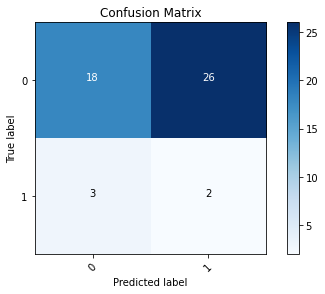

In [46]:
cm_plot_labels = ['0','1']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [47]:
38/44

0.8636363636363636

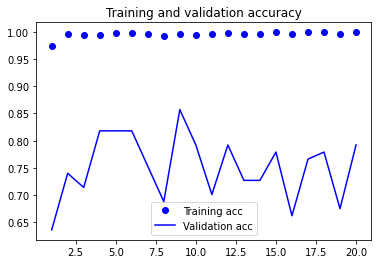

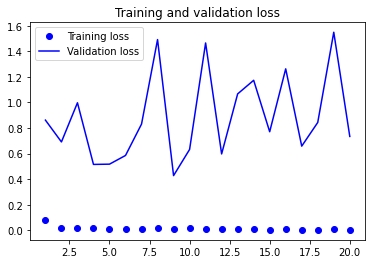

In [48]:
import matplotlib.pyplot as plt
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# pose_matching_with_PoseNet_mobilenet



In [49]:
import tensorflow as tf
import numpy as np
from PIL import Image
import pickle
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
import math

In [50]:
import tensorflow as tf
model_path = "/content/drive/MyDrive/posenet_mobilenet_v1_100_257x257_multi_kpt_stripped.tflite"

In [51]:
# Load TFLite model and allocate tensors (memory usage method reducing latency)
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

In [52]:
# Get input and output tensors information from the model file
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

height = input_details[0]['shape'][1]
width = input_details[0]['shape'][2]

In [53]:
target_path = "/content/drive/MyDrive/training_bms/baby_sleeping /10.jpg"

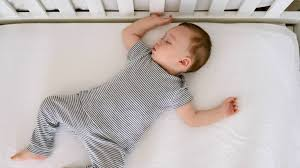

In [54]:
target_image_src = cv.imread(target_path)
src_target_width, src_target_height, _ = target_image_src.shape 
target_image = cv.resize(target_image_src, (width, height))
cv2_imshow(target_image_src)

In [55]:
# can be used later to draw keypoints on the source image (before resizing)
# templ_ratio_width = src_tepml_width/width
# templ_ratio_height = src_templ_height/height

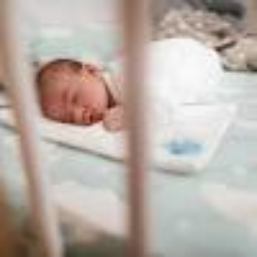

In [56]:
test_path = "/content/drive/MyDrive/training_bms/baby_sleeping /33.jpg"
test_image_src = cv.imread(test_path)
# src_tar_width, src_tar_height, _ = target_image_src.shape 
test_image = cv.resize(test_image_src, (width, height))
cv2_imshow(test_image)

In [57]:
# tar_ratio_width = src_tar_width/width
# tar_ratio_height = src_tar_height/height

In [58]:

# add a new dimension to match model's input
target_input = np.expand_dims(target_image.copy(), axis=0)
test_input = np.expand_dims(test_image.copy(), axis=0)

In [59]:
# check the type of the input tensor
floating_model = input_details[0]['dtype'] == np.float32

In [60]:
if floating_model:
  target_input = (np.float32(target_input) - 127.5) / 127.5
  test_input = (np.float32(test_input) - 127.5) / 127.5

In [61]:
# Process template image
# Sets the value of the input tensor
interpreter.set_tensor(input_details[0]['index'], target_input)
# Runs the computation
interpreter.invoke()
# Extract output data from the interpreter
target_output_data = interpreter.get_tensor(output_details[0]['index'])
target_offset_data = interpreter.get_tensor(output_details[1]['index'])
# Getting rid of the extra dimension
target_heatmaps = np.squeeze(target_output_data)
target_offsets = np.squeeze(target_offset_data)
print("target_heatmaps' shape:", target_heatmaps.shape)
print("target_offsets' shape:", target_offsets.shape)

target_heatmaps' shape: (9, 9, 17)
target_offsets' shape: (9, 9, 34)


In [62]:
# Process target image. Same commands
interpreter.set_tensor(input_details[0]['index'], test_input)
interpreter.invoke()
test_output_data = interpreter.get_tensor(output_details[0]['index'])
test_offset_data = interpreter.get_tensor(output_details[1]['index'])
test_heatmaps = np.squeeze(test_output_data)
test_offsets = np.squeeze(test_offset_data)

In [63]:
# The output consist of 2 parts:
# - heatmaps (9,9,17) - corresponds to the probability of appearance of 
# each keypoint in the particular part of the image (9,9)(without applying sigmoid 
# function). Is used to locate the approximate position of the joint
# - offset vectors (9,9,34) is called offset vectors. Is used for more exact
#  calculation of the keypoint's position. First 17 of the third dimension correspond
# to the x coordinates and the second 17 of them correspond to the y coordinates

In [64]:
def parse_output(heatmap_data,offset_data, threshold):

  '''
  Input:
    heatmap_data - hetmaps for an image. Three dimension array
    offset_data - offset vectors for an image. Three dimension array
    threshold - probability threshold for the keypoints. Scalar value
  Output:
    array with coordinates of the keypoints and flags for those that have
    low probability
  '''

  joint_num = heatmap_data.shape[-1]
  pose_kps = np.zeros((joint_num,3), np.uint32)

  for i in range(heatmap_data.shape[-1]):

      joint_heatmap = heatmap_data[...,i]
      max_val_pos = np.squeeze(np.argwhere(joint_heatmap==np.max(joint_heatmap)))
      remap_pos = np.array(max_val_pos/8*257,dtype=np.int32)
      pose_kps[i,0] = int(remap_pos[0] + offset_data[max_val_pos[0],max_val_pos[1],i])
      pose_kps[i,1] = int(remap_pos[1] + offset_data[max_val_pos[0],max_val_pos[1],i+joint_num])
      max_prob = np.max(joint_heatmap)

      if max_prob > threshold:
        if pose_kps[i,0] < 257 and pose_kps[i,1] < 257:
          pose_kps[i,2] = 1

  return pose_kps

In [65]:
def draw_kps(show_img,kps, ratio=None):
    for i in range(5,kps.shape[0]):
      if kps[i,2]:
        if isinstance(ratio, tuple):
          cv.circle(show_img,(int(round(kps[i,1]*ratio[1])),int(round(kps[i,0]*ratio[0]))),2,(0,255,255),round(int(1*ratio[1])))
          continue
        cv.circle(show_img,(kps[i,1],kps[i,0]),2,(0,255,255),-1)
    return show_img

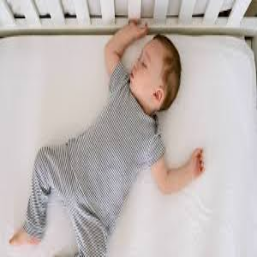

In [66]:
target_show = np.squeeze((target_input.copy()*127.5+127.5)/255.0)
target_show = np.array(target_show*255,np.uint8)
target_kps = parse_output(target_heatmaps,target_offsets,0.3)
cv2_imshow(draw_kps(target_show.copy(),target_kps))

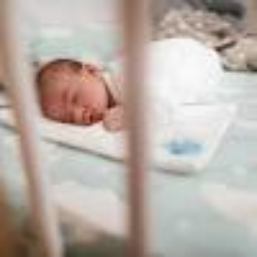

In [67]:
test_show = np.squeeze((test_input.copy()*127.5+127.5)/255.0)
test_show = np.array(test_show*255,np.uint8)
test_kps = parse_output(test_heatmaps,test_offsets,0.3)
cv2_imshow(draw_kps(test_show.copy(),test_kps))

# Matching by angles and proportions


In [68]:
#Set template values
# Matching keypoints indices in the output of PoseNet
# 0. Left shoulder to right shoulder (5-6)
# 1. Left shoulder to left elbow (5-7)
# 2. Right shoulder to right elbow (6-8)
# 3. Left elbow to left wrist (7-9)
# 4. Right elbow to right wrist (8-10)
# 5. Left hip to right hip (11-12)
# 6. Left shoulder to left hip (5-11)
# 7. Right shoulder to right hip (6-12)
# 8. Left hip to left knee (11-13)
# 9. Right hip to right knee (12-14)
# 10. Left knee to left ankle (13-15)
# 11.  Right knee to right ankle (14-16)

In [69]:
parts_to_compare = [(5,6),(5,7),(6,8),(7,9),(8,10),(11,12),(5,11),(6,12),(11,13),(12,14),(13,15),(14,16)]


In [70]:
def angle_length(p1, p2):

  '''
  Input:
    p1 - coordinates of point 1. List
    p2 - coordinates of point 2. List
  Output:
    Tuple containing the angle value between the line formed by two input points 
    and the x-axis as the first element and the length of this line as the second
    element
  '''

  angle = math.atan2(- int(p2[0]) + int(p1[0]), int(p2[1]) - int(p1[1])) * 180.0 / np.pi
  length = math.hypot(int(p2[1]) - int(p1[1]), - int(p2[0]) + int(p1[0]))
  
  return round(angle), round(length)

In [71]:
target_values = []
for part in parts_to_compare:
  target_values.append(angle_length(target_kps[part[0]][:2], target_kps[part[1]][:2]))
target_values

[(172, 51),
 (95, 139),
 (74, 115),
 (8, 7),
 (56, 25),
 (162, 131),
 (-45, 127),
 (-73, 59),
 (144, 192),
 (115, 81),
 (-111, 96),
 (-119, 54)]

In [72]:
test_values = []
for part in parts_to_compare:
  test_values.append(angle_length(test_kps[part[0]][:2], test_kps[part[1]][:2]))
test_values

[(0, 4294967169),
 (34, 4),
 (180, 4294967099),
 (43, 140),
 (-29, 71),
 (-145, 279),
 (25, 149),
 (-180, 4294967262),
 (-143, 256),
 (36, 281),
 (-86, 14),
 (-140, 265)]

In [73]:
#with open('target.pkl', 'wb') as f:
 # pickle.dump(target, f)

In [74]:
 #with open('target.pkl', 'rb') as f:
   #target = pickle.load(f)

#Matching


In [75]:
def matching(target_kp, test_kp, angle_deviation=30, size_deviation=1):

  '''Input:
      1. template_kp - list of tuples (for the template image) containng angles 
      between particular body parts and x-axis as first elements and its sizes 
      (distances between corresponding points as second elements)
      2. target_kp - same for the target image
      3. angle_deviation - acceptable angle difference between corresponding 
      body parts in the images
      4. size_deviation - acceptable proportions difference between the images
    Output:
      List of body parts which are deviated
  '''

  devs = []

  # set an anchor size for proportions calculations - distance between shoulders
  target_anchor = target_kp[0][1]
  test_anchor = test_kp[0][1]

  # for each body part that we calculated angle and size for
  for i in range(len(target_kp)):

    angles = (target_kp[i][0], test_kp[i][0])
    diff_angle = max(angles) - min(angles)

    target_size = (target_kp[i][1],target_anchor)
    target_size = abs(min(target_size) / max(target_size))

    test_size = (test_kp[i][1], test_anchor)
    test_size = abs(min(test_size) / max(test_size))

    if diff_angle > angle_deviation:
      devs.append(i)
      print("{0} has different angle".format(i))

    elif max(test_size,target_size) - min(test_size,target_size) > size_deviation:
      devs.append(i)
      print("{0} has different size".format(i))

  return devs

In [76]:
deviations = matching(target_values, test_values)
deviations

0 has different angle
1 has different angle
2 has different angle
3 has different angle
4 has different angle
5 has different angle
6 has different angle
7 has different angle
8 has different angle
9 has different angle


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Draw deviations

In [77]:
def draw_deviations(img, keypoints, pairs, deviations):

  for i, pair in enumerate(pairs):

    if i in deviations:
      color = (0,0,255)
    else:
      color = (0,255,0)
      
    cv.line(img, (keypoints[pair[0]][1], keypoints[pair[0]][0]), (keypoints[pair[1]][1], keypoints[pair[1]][0]), color=color, lineType=cv.LINE_AA, thickness=1)

In [78]:
draw_deviations(test_show, test_kps, parts_to_compare, deviations)

error: ignored

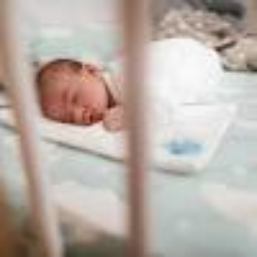

In [79]:
cv2_imshow(test_show)

In [80]:
 cv.imwrite('devs.jpg', test_show)

True

# Matching by finding the target pose in the image

## Set a target pattern

In [81]:
# Get a zero matrix with the shape of the template image
target_pose = np.zeros_like(target_show)
test_pose = np.zeros_like(test_show)

In [82]:
# connect some of the points 
def join_point(img, kps):

  body_parts = [(5,6),(5,7),(6,8),(7,9),(8,10),(11,12),(5,11),
                      (6,12),(11,13),(12,14),(13,15),(14,16)]

  for part in body_parts:
    cv.line(img, (kps[part[0]][1], kps[part[0]][0]), (kps[part[1]][1], kps[part[1]][0]), 
            color=(255,255,255), lineType=cv.LINE_AA, thickness=3)

In [83]:
# draw a skeleton of the template pose to the empty image
join_point(target_pose, target_kps[:, :2])

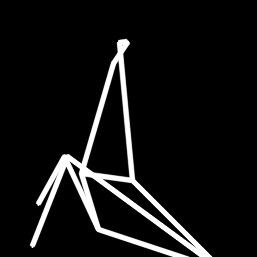

In [84]:
cv2_imshow(target_pose)

In [85]:
# set the new dimensions of the image to reduce the size
buffer = 5 # size of the area around the pose
top_left_y = min(test_kps[5:, 0]) - buffer
top_left_x = min(test_kps[5:, 1]) - buffer
buttom_right_y = max(test_kps[5:, 0]) + buffer
buttom_right_x = max(test_kps[5:, 1]) + buffer

In [86]:
# crop the template pose with new dimensions
test_pose = test_pose[top_left_y:buttom_right_y,top_left_x:buttom_right_x]

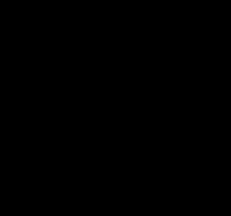

In [87]:
cv2_imshow(test_pose)

In [88]:
# save the template pattern
cv.imwrite('target_pose.jpg', target_pose)

True

# Find the pattern in the new image

In [89]:
# Get a zero matrix with the shape of the target image
target_pose = np.zeros_like(target_show)

In [90]:
# draw a skeleton of the target pose to the empty image
join_point(target_pose, target_kps[:, :2])

In [91]:
# set the new dimensions of the image to reduce the size
buffer = 5 # size of the area around the pose
top_left_y = min(target_kps[5:, 0]) - buffer
top_left_x = min(target_kps[5:, 1]) - buffer
buttom_right_y = max(target_kps[5:, 0]) + buffer
buttom_right_x = max(target_kps[5:, 1]) + buffer

In [92]:

test_pose = test_pose[top_left_y:buttom_right_y, top_left_x:buttom_right_x]

In [93]:
target_pose = cv.cvtColor(target_pose, cv.COLOR_BGR2GRAY)
test_pose = cv.cvtColor(test_pose, cv.COLOR_BGR2GRAY)

In [94]:
# the greater the threshold the more exact the pose has to match
threshold = 0.8

w, h = test_pose.shape[::-1]
res = cv.matchTemplate(test_pose,target_pose,cv.TM_CCOEFF_NORMED)
score = res.max()

print("score:", score)

if score >= threshold:
  print("Safe Position")
else:
  print("Dangerous position")

score: 1.0
Safe Position


# Draw grid

In [95]:
def draw_grid(img, grid_size=9, heatmap=None, part=1):

    color = (0,255,255)

    small_size = min(img.shape[0], img.shape[1])
    cell_size = small_size // grid_size
    res = int(small_size % grid_size)

    x = res // 2
    y = res // 2

    while x < img.shape[1]:
      cv.line(img, (x, 0), (x, img.shape[0]), color=color, lineType=cv.LINE_AA, thickness=1)
      x += cell_size

    while y < img.shape[0]:
      cv.line(img, (0, y), (img.shape[1], y), color=color, lineType=cv.LINE_AA, thickness=1)
      y += cell_size

    center_x = res//2
    center_y = res//2 + cell_size//2

    cv.putText(image,str(round(heatmap[0,0,part],1)), (center_x,center_y), cv.FONT_HERSHEY_SIMPLEX, 0.3, color)

    for row_idx, row in enumerate(heatmap[...,part]):

      for col_idx, column in enumerate(row):
        cv.putText(image,str(round(heatmap[col_idx,row_idx,part],1)), (center_x,center_y), cv.FONT_HERSHEY_SIMPLEX, 0.3, color)
        center_y += cell_size
        
      center_x += cell_size
      center_y = res//2 + cell_size//2

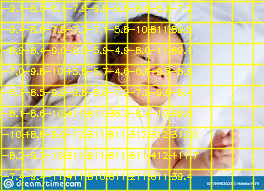

In [96]:
image = cv.imread('/content/drive/MyDrive/training_bms/baby_not_sleeping/8.jpg')
draw_grid(image, 9, target_heatmaps)
cv2_imshow(image)

#Object Detection with TensorFlow Lite Model Maker



In [ ]:
!pip install -q tflite-model-maker
!pip install -q pycocotools

In [ ]:
import numpy as np
import os

from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

#  Choose an object detection model archiecture.



In [ ]:
spec = model_spec.get('efficientdet_lite0')

In [ ]:
train_data, validation_data, test_data = object_detector.DataLoader('/content/drive/MyDrive/training_bms')

In [ ]:
model = object_detector.create(train_batches, model_spec=spec, epochs=10, validation_data=valid_batches)

In [98]:
def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

In [99]:
#!curl -o logo.png "/content/drive/MyDrive/training_bms/baby_sleeping/1.jpg"

In [104]:
import cv2

def drawsafelines(image_np,Orientation,Line_Perc1,Line_Perc2):
    
    posii=int(image_np.shape[1]-(image_np.shape[1]/3))
    cv2.putText(image_np,'Blue Line : Bed edge Line',
                        (posii,30),
                        cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.5, (0,0,255), 1, cv2.LINE_AA)
    cv2.putText(image_np, 'Red Line : Safety Border Line',
                        (posii,50),
                        cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.5, (255,0,0), 1, cv2.LINE_AA)
    
    if(Orientation=="bt"):
        
        Line_Position1=int(image_np.shape[0]*(Line_Perc1/100))
        
        Line_Position2=int(image_np.shape[0]*(Line_Perc2/100))
        
        cv2.line(img=image_np, pt1=(0, Line_Position1), pt2=(image_np.shape[1], Line_Position1), color=(0, 0, 255), thickness=2, lineType=8, shift=0)
                
        cv2.line(img=image_np, pt1=(0, Line_Position2), pt2=(image_np.shape[1], Line_Position2), color=(255, 0, 0), thickness=2, lineType=8, shift=0)
        
        return Line_Position2;
        
    elif(Orientation=="tb"):
       
        Line_Position1=int(image_np.shape[0]-(image_np.shape[0]*(Line_Perc1/100)))
        
        Line_Position2=int(image_np.shape[0]-(image_np.shape[0]*(Line_Perc2/100)))
        
        cv2.line(img=image_np, pt1=(0, Line_Position1), pt2=(image_np.shape[1], Line_Position1), color=(0, 0, 255), thickness=2, lineType=8, shift=0)
                 
        cv2.line(img=image_np, pt1=(0, Line_Position2), pt2=(image_np.shape[1], Line_Position2), color=(255, 0, 0), thickness=2, lineType=8, shift=0)
        
        return Line_Position2;
    
    elif(Orientation=="lr"):
        
        
        Line_Position1=int(image_np.shape[1]-(image_np.shape[1]*(Line_Perc1/100)))
        
        Line_Position2=int(image_np.shape[1]-(image_np.shape[1]*(Line_Perc2/100)))
        
        cv2.line(img=image_np, pt1=(Line_Position1, 0), pt2=(Line_Position1,image_np.shape[0]), color=(0, 0, 255), thickness=2, lineType=8, shift=0)
                
        cv2.line(img=image_np, pt1=(Line_Position2, 0), pt2=(Line_Position2,image_np.shape[0]), color=(255, 0, 0), thickness=2, lineType=8, shift=0)
           
        return Line_Position2;
        
        
    elif(Orientation=="rl"):
        
        Line_Position1=int(image_np.shape[1]*(Line_Perc1/100))
        
        Line_Position2=int(image_np.shape[1]*(Line_Perc2/100))
        
        cv2.line(img=image_np, pt1=(Line_Position1, 0), pt2=(Line_Position1,image_np.shape[0]), color=(0, 0, 255), thickness=2, lineType=8, shift=0)
                
        cv2.line(img=image_np, pt1=(Line_Position2, 0), pt2=(Line_Position2,image_np.shape[0]), color=(255, 0, 0), thickness=2, lineType=8, shift=0)
        
        return Line_Position2;


In [143]:
#For bed
#Line_Perc1=float(input("Enter the percent of screen the line of bed :"))
Line_Perc1=float(15)
#For Safety
#Line_Perc2=float(input("Enter the percent of screen for the line of safety :"))
Line_Perc2=float(30)

drawsafelines(image_np,'lr',Line_Perc1,Line_Perc2)

157

<class 'numpy.ndarray'>


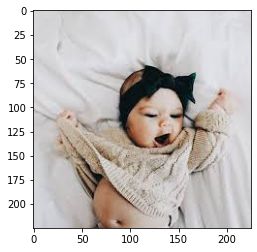

In [144]:
from PIL import Image
from numpy import asarray

image = Image.open('/content/drive/MyDrive/training_bms/baby_not_sleeping/1.jpg')

plt.imshow(image)
# convert image to numpy array
image_np = asarray(image)
print(type(image_np))

# Custom Object Detection

In [106]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 35kB/s 


In [107]:
import tensorflow as tf
print(tf.__version__)

2.5.0


# Cloning TFOD 2.0 Github

In [109]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 58054, done.
remote: Counting objects: 100% (461/461), done.
remote: Compressing objects: 100% (196/196), done.
remote: Total 58054 (delta 288), reused 417 (delta 265), pack-reused 57593
Receiving objects: 100% (58054/58054), 573.17 MiB | 30.88 MiB/s, done.
Resolving deltas: 100% (40246/40246), done.


In [108]:
pwd

'/content'

In [ ]:
cd /content/models/research

In [133]:
pwd


'/content/drive/My Drive/training_demo'

In [111]:
!protoc object_detection/protos/*.proto --python_out=.

object_detection/protos/*.proto: No such file or directory


In [112]:
!git clone https://github.com/cocodataset/cocoapi.git


Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 31.43 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [113]:
cd cocoapi/PythonAPI

/content/cocoapi/PythonAPI


In [114]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/includ

In [115]:
cp -r pycocotools /content/models/research

# install the Object Detection API

In [116]:
cd ..

/content/cocoapi


In [117]:
cd ..

/content


In [118]:
pwd

'/content'

In [119]:
cp object_detection/packages/tf2/setup.py .

cp: cannot stat 'object_detection/packages/tf2/setup.py': No such file or directory


In [120]:
!python -m pip install .

ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [121]:
# From within TensorFlow/models/research/
!python object_detection/builders/model_builder_tf2_test.py

python3: can't open file 'object_detection/builders/model_builder_tf2_test.py': [Errno 2] No such file or directory


In [122]:
pwd

'/content'

In [123]:
# From within TensorFlow/models/research/
!python object_detection/builders/model_builder_tf2_test.py

python3: can't open file 'object_detection/builders/model_builder_tf2_test.py': [Errno 2] No such file or directory


In [124]:
cd /content/training_demo/pre-trained-models 

[Errno 2] No such file or directory: '/content/training_demo/pre-trained-models'
/content


In [125]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

--2021-06-29 06:22:29--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.253.117.128, 2607:f8b0:400e:c01::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.253.117.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386527459 (369M) [application/x-tar]
Saving to: ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet101_v1_fp 100%[===================>] 368.62M   205MB/s    in 1.8s    

2021-06-29 06:22:31 (205 MB/s) - ‘ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [386527459/386527459]



In [126]:
!tar -xvf ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [127]:
pwd

'/content'

In [128]:
cd /content/drive/MyDrive/training_demo


/content/drive/MyDrive/training_demo


In [129]:
# Create train data:
!python generate_tfrecord.py -x /content/drive/MyDrive/training_demo/images/train -l /content/drive/MyDrive/training_demo/annotations/label_map.pbtxt -o /content/drive/MyDrive/training_demo/annotations/test.record

# Create test data:
!python generate_tfrecord.py -x /content/drive/MyDrive/training_demo/images/test -l /content/drive/MyDrive/training_demo/annotations/label_map.pbtxt -o /content/drive/MyDrive/training_demo/annotations/test.record


Traceback (most recent call last):
  File "generate_tfrecord.py", line 29, in <module>
    from object_detection.utils import dataset_util, label_map_util
ModuleNotFoundError: No module named 'object_detection'
Traceback (most recent call last):
  File "generate_tfrecord.py", line 29, in <module>
    from object_detection.utils import dataset_util, label_map_util
ModuleNotFoundError: No module named 'object_detection'


In [130]:
pwd

'/content/drive/MyDrive/training_demo'

In [131]:
ls

annotations/          model_main_tf2.py
cocoapi/              models/
generate_tfrecord.py  ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/
images/               ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz


In [132]:
!python model_main_tf2.py --model_dir=/content/drive/MyDrive/training_demo/models/my_ssd_resnet50_v1_fpn --pipeline_config_path=/content/drive/MyDrive/training_demo/models/my_ssd_resnet101_v1_fpn/pipeline.config

2021-06-29 06:22:43.517946: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Traceback (most recent call last):
  File "model_main_tf2.py", line 32, in <module>
    from object_detection import model_lib_v2
ModuleNotFoundError: No module named 'object_detection'
